In [75]:
import pandas as pd
import re

# Path to your log file
log_file = 'gradient_descent.log'

# Read the file
with open(log_file, 'r') as f:
    lines = f.readlines()

# Define column names based on header in log
columns = [
    "Iter", "dir", "h_norm", "Cost", "New_Cost", 
    "r_norm", "r_new_norm", "D_time", "E_time", "T_time", "Status"
]

# Prepare a list to hold parsed rows
data = []

for line in lines:
    # Skip empty or header lines
    if line.strip().startswith('#') or not line.strip():
        continue

    # Extract values using regex
    match = re.match(
        r"\s*(\d+)\s+([-+.\deE]+)\s+([-+.\deE]+)\s+([-+.\deE]+)\s+([-+.\deE]+)\s+([-+.\deE]+)\s+([-+.\deE]+)"
        r"\s+D=([\d.]+)s E=([\d.]+)s T=([\d.]+)s\s+(\w+)", 
        line
    )
    if match:
        data.append([float(match.group(i)) if i != 11 else match.group(i) for i in range(1, 12)])

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Example usage
print(df.head())

Empty DataFrame
Columns: [Iter, dir, h_norm, Cost, New_Cost, r_norm, r_new_norm, D_time, E_time, T_time, Status]
Index: []


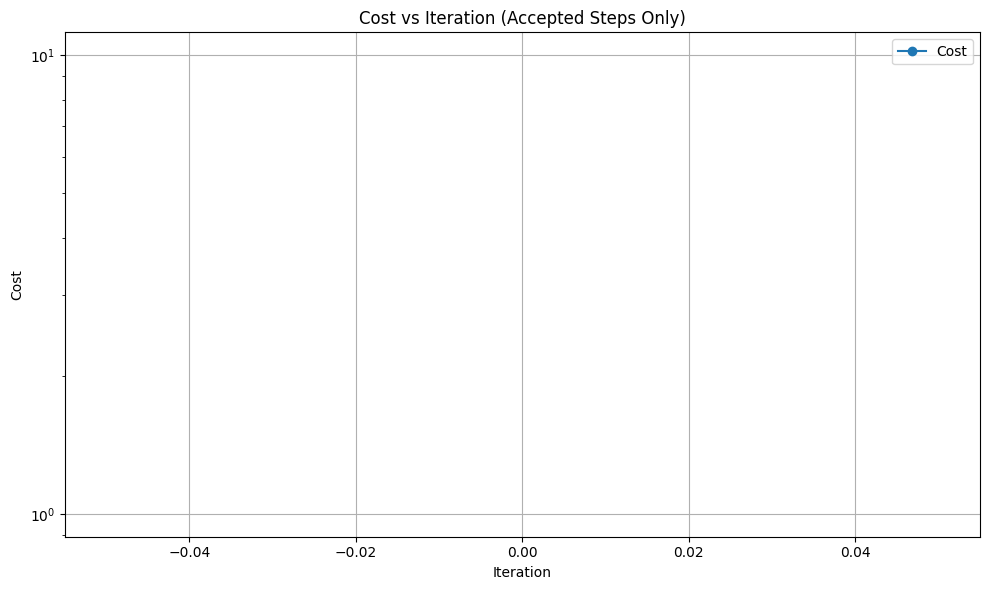

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Filter only accepted iterations
df_accepted = df[df['Status'] == 'ACCEPTED']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_accepted['Iter'], df_accepted['Cost'], label='Cost', marker='o')
# plt.plot(df_accepted['Iter'], df_accepted['New_Cost'], label='New Cost', marker='x')

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration (Accepted Steps Only)')
plt.yscale('log')  # Optional: Use log scale if cost varies a lot
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

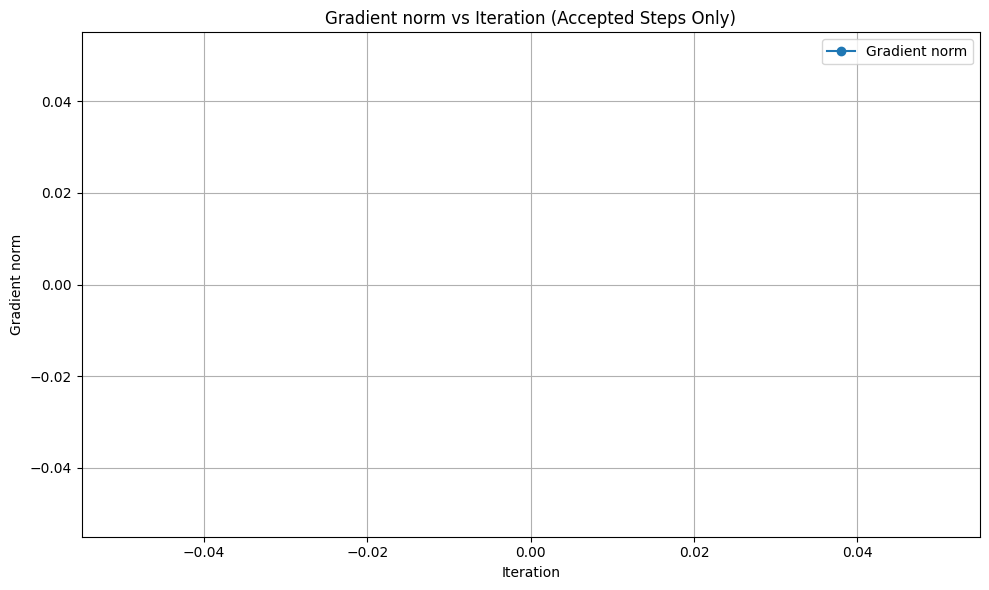

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame
# Filter only accepted iterations
df_accepted = df[df['Status'] == 'ACCEPTED']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_accepted['Iter'], df_accepted['r_norm'], label='Gradient norm', marker='o')
# plt.plot(df_accepted['Iter'], df_accepted['New_Cost'], label='New Cost', marker='x')

plt.xlabel('Iteration')
plt.ylabel('Gradient norm')
plt.title('Gradient norm vs Iteration (Accepted Steps Only)')
# plt.yscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

   Iter      h_norm  step_size       cost  new_cost   grad_norm  \
0     1  2370.32000    0.00001  23.667000  0.170027  2370.32000   
1     2   207.46500    0.00001   0.170027  0.007634   207.46500   
2     3    36.37930    0.00001   0.007634  0.001271    36.37930   
3     4    13.89150    0.00001   0.001271  0.000223    13.89150   
4     5     5.77087    0.00001   0.000223  0.000042     5.77087   

   new_grad_norm     time    status  
0      207.46500  3.28060  ACCEPTED  
1       36.37930  3.25547  ACCEPTED  
2       13.89150  3.26426  ACCEPTED  
3        5.77087  3.26310  ACCEPTED  
4        2.49798  3.26068  ACCEPTED  


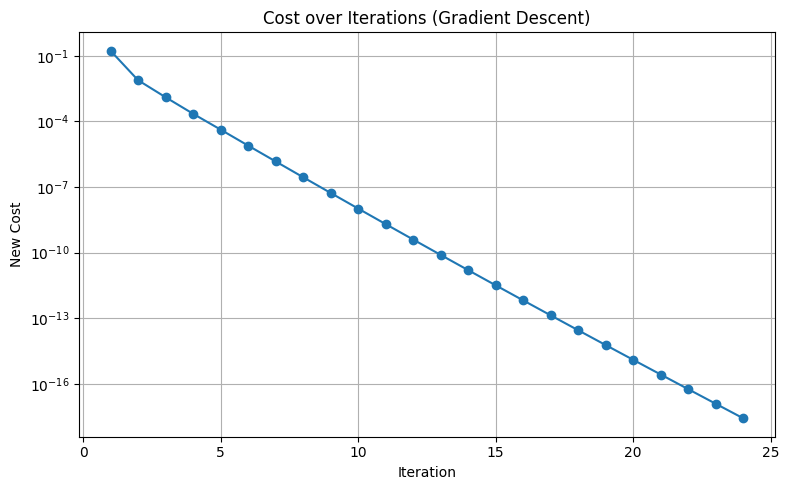

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Read the log file
with open("gradient_descent.log", "r") as f:
    lines = f.readlines()

# Skip the header
data_lines = [line.strip() for line in lines if re.match(r"\s*\d+", line)]

# Prepare parsed rows
parsed_rows = []

for line in data_lines:
    parts = line.split()
    # print(parts)
    if len(parts) < 9:
        continue  # skip malformed lines

    row = {
        "Iter": int(parts[0]),
        "h_norm": float(parts[1]),
        "step_size": float(parts[2]),
        "cost": float(parts[3]),
        "new_cost": float(parts[4]),
        "grad_norm": float(parts[5]),
        "new_grad_norm": float(parts[6]),
        "time": float(parts[7].split('=')[-1].replace('s', '')),
        "status": parts[-1]
    }
    parsed_rows.append(row)

# Convert to DataFrame
df = pd.DataFrame(parsed_rows)

# Print DataFrame (optional)
print(df.head())

# Plot cost
plt.figure(figsize=(8, 5))
plt.plot(df["Iter"], df["new_cost"], marker='o')
plt.title("Cost over Iterations (Gradient Descent)")
plt.xlabel("Iteration")
plt.ylabel("New Cost")
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
# plt.savefig("cost_plot.png")
plt.show()
